In [37]:
# read file 'random_signal.mat'
import scipy.io

mat = scipy.io.loadmat('random_signal.mat')
print(mat)

signal = mat['signal'][0]
print(len(signal))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Nov 28 09:46:44 2013', '__version__': '1.0', '__globals__': [], 'Fs': array([[8000]], dtype=uint16), 'signal': array([[0.78025207, 0.78020727, 0.78016246, ..., 0.45099131, 0.45095751,
        0.45092371]])}
160000


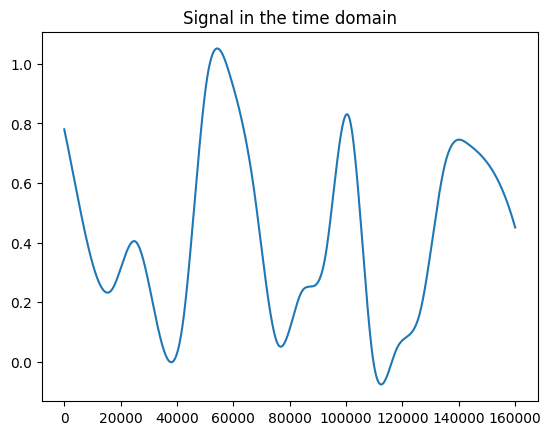

In [24]:
# plot the signal
import matplotlib.pyplot as plt

plt.plot(signal[::])
plt.title('Signal in the time domain')
plt.show()

100%|██████████| 160000/160000 [00:19<00:00, 8063.34it/s]


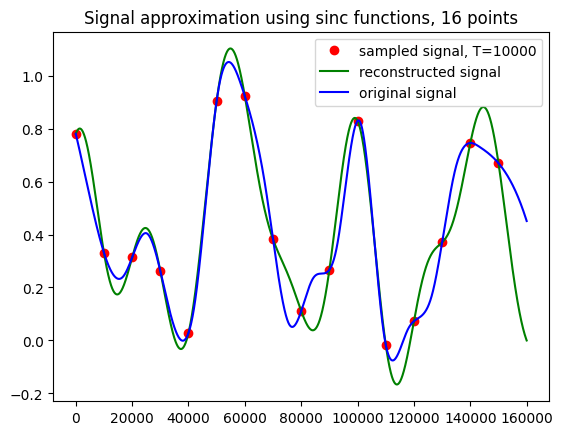

In [36]:
# perform a signal approximation using sinc functions

import numpy as np
from tqdm import tqdm


def sinc_approximation(signal_sampled, sampling_period):

    signal_reconstructed = np.zeros(len(signal_sampled) * sampling_period)

    def signal_reconstr_t(t):
        # for a point of the reconstructed signal, iterate over the sampled signal,
        # add the value of each sinc function at that point
        # multiplied by the value of the sampled signal at the corresponding point
        val = 0
        for n in range(len(signal_sampled)):
            val += signal_sampled[n] * np.sinc(t / sampling_period - n)
        return val

    for t in tqdm(range(len(signal_reconstructed))):
        signal_reconstructed[t] = signal_reconstr_t(t)

    return signal_reconstructed


# choose a sampling period, sample the signal
sampling_period = 10000
sampled_points = np.arange(0, len(signal), sampling_period)

# reconstruct the signal with sinc functions
signal_approx = sinc_approximation(signal[sampled_points], sampling_period)

# plot the results
plt.plot(sampled_points, signal[sampled_points], label=f'sampled signal, T={sampling_period}', marker='o', color='red', linestyle='None')
plt.plot(signal_approx, label='reconstructed signal', color='green')
plt.plot(signal, label='original signal', color='blue')

plt.legend()
plt.title(f'Signal approximation using sinc functions, {len(sampled_points)} points')
plt.show()